<h2 style="font-weight: 700; text-align: center">Image Enhancement - 2 (Point Processing - 2)</h2>

#### Required Libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Importing the subject image in grayscale format

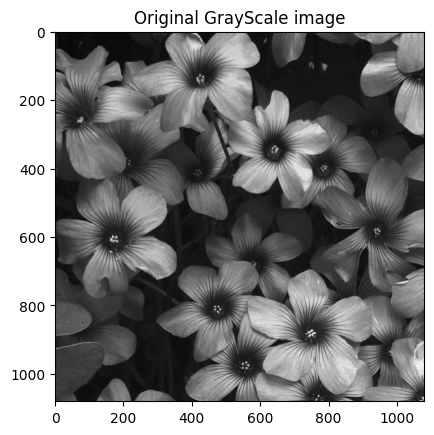

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
img_grayed = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.title("Original GrayScale image")
plt.imshow(img_grayed, cmap="gray")
plt.show()

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(10, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Contrast Stretching

In [4]:
img2 = cv.imread("./Low Contrast.jpg")
img2_grayed = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

In [5]:
def contrast_stretch(img, l, m, n, a, b, show_plots: bool = True):
  contrast_stretched_img = []
  v = l * a
  w = m * (b - a) + v 
  for row in img:
    new_row = []
    for r in row:
      if 0 < r <= a:
        new_row.append(int(l * r))
      elif a < r <= b:
        new_row.append(int(m * (r - a) + v))
      else:
        new_row.append(int(n * (r - b) + w))
    contrast_stretched_img.append(new_row)
  
  contrast_stretched_img = np.array(contrast_stretched_img)
  if show_plots:
    matplot_images(img, contrast_stretched_img, titles=[f"Original Grayscale Image (Min: {img.min()}, Max: {img.max()})", f"Contrast Stretched Image (Min: {contrast_stretched_img.min()}, Max: {contrast_stretched_img.max()})"])

#### l, n < 1<br>m > 1

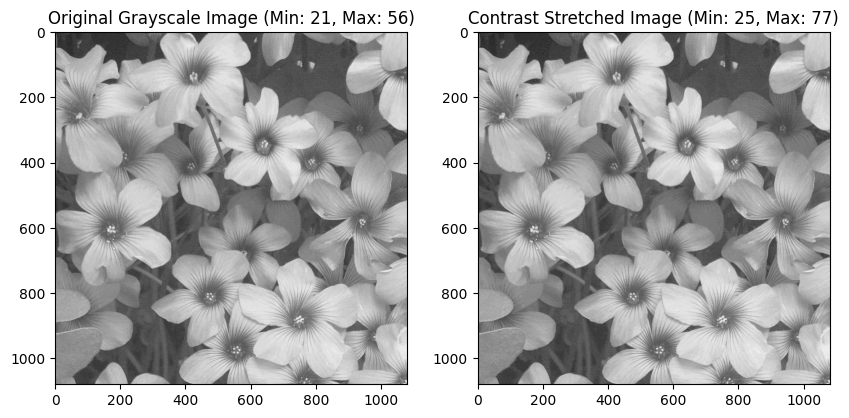

In [6]:
contrast_stretch(img2_grayed, 0.2, 1.5, 0.6, 5, 80)

#### l, m, n < 1

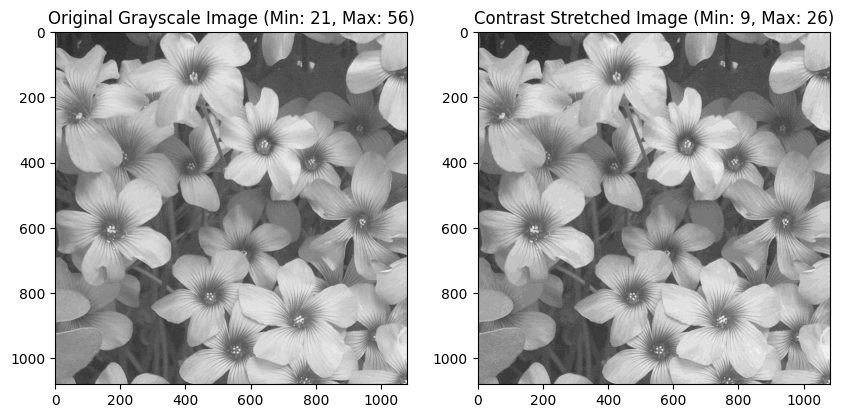

In [7]:
contrast_stretch(img2_grayed, 0.2, 0.5, 0.6, 5, 80)

#### Dynamic Range Compression - Log Transformation

In [8]:
def drc_log_tf(img, c: int | float = 10, show_plot:bool = True):
  # log_tf_img = [[c * np.log(r + 1) for r in row] for row in img]     # data type error
  log_tf_img = c * np.log(img + 1) 
  log_tf_img = np.array(log_tf_img, dtype = np.uint8)
  if show_plot:
    matplot_images(img, log_tf_img, titles=[f"Original Grayscale Image (Min: {img.min()}, Max: {img.max()})", f"DyR Compressed Image (Min: {log_tf_img.min()}, Max: {log_tf_img.max()})"])

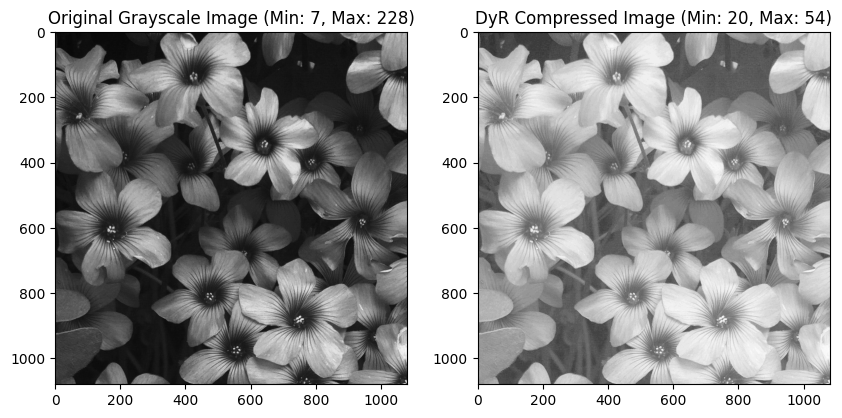

In [9]:
drc_log_tf(img_grayed)

#### Power Law Transformation

In [20]:
def power_law_tf(img, γ = 0.2, c = 1, show_plot:bool = True):
  # power_tf_img = np.array([[int(np.floor(c * (r ** γ))) % 255  for r in row] for row in img])
  pltf_img = np.array([[(c * (r / 255) ** γ) for r in img[i]] for i in range(img.shape[0])])

  # power_tf_img = np.array([[int(np.floor(r ** γ))  for r in row] for row in img])
  if show_plot:
    matplot_images(img, pltf_img, titles=[f"Original Grayscale Image (Min: {(img.min())}, Max: {img.max()})", f"Power Transformed Image (Min: {round(pltf_img.min(), 4)}, Max: {round(pltf_img.max(), 4)})"])

##### γ = 0.2

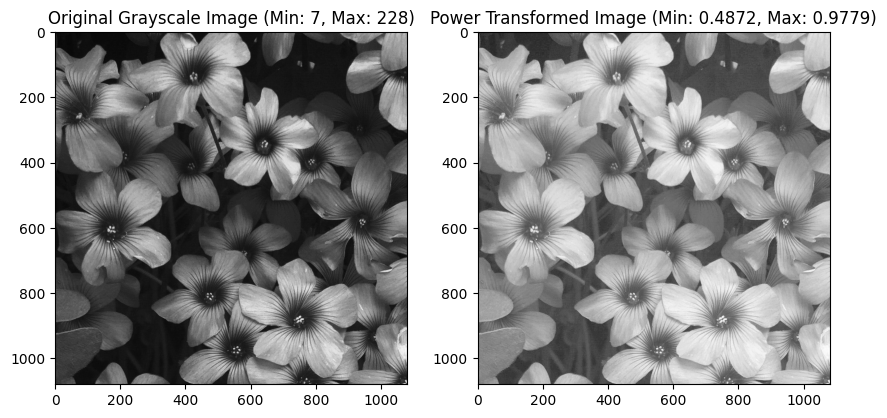

In [21]:
power_law_tf(img_grayed)

##### γ = 1

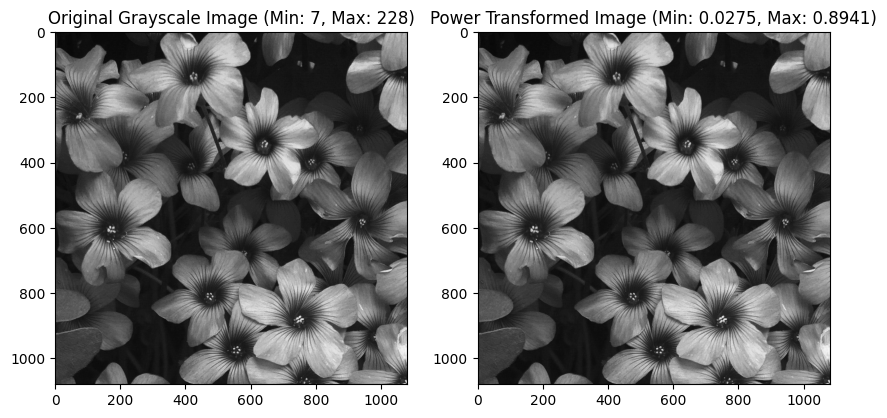

In [22]:
power_law_tf(img_grayed, 1)

##### γ = 10

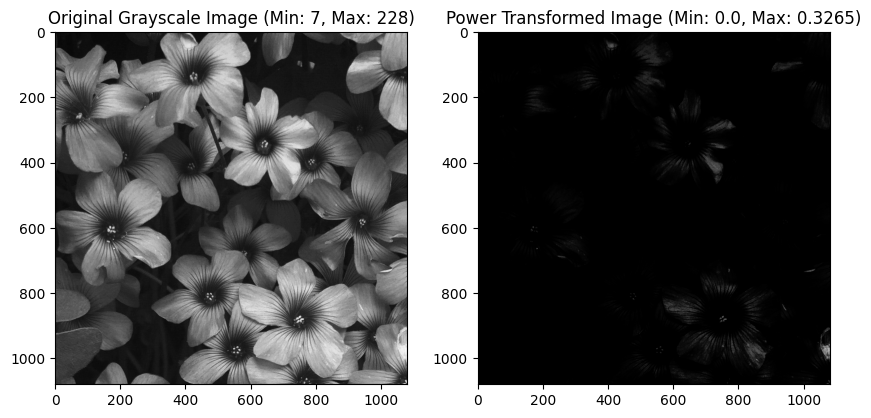

In [23]:
power_law_tf(img_grayed, 10)

#### Conclusion

- On correct values of l, m, n, contrast stretching increased the dynamic range of the input image.
- Incorrect values of l, m, n (m especially) resulted in an image with lesser dyanamic range than the input image after contrast stretching which is not the goal of contrast stretching to begin with.
- Dynamic Range can be compressed using Log transformation on the original grayscale values.
- Power Transformation can also achieve modifications on the dynamic range of the input image, 
  - Power = 1 keeps the image unchanged.
  - Power > 1 makes the image darker. 
  - Power < 1 makes the image lighter.